# SlideRule Interactive Feature Find

SlideRule is an on-demand science data processing service that runs in on Amazon Web Services and responds to REST API calls to process and return science results.  SlideRule was designed to enable researchers and other data systems to have low-latency access to custom-generated, high-level, analysis-ready data products using processing parameters supplied at the time of the request. 

[Documentation for using SlideRule](https://slideruleearth.io/rtd) is available from the [project website](https://slideruleearth.io) 

## Learning goals

- Finding interesting features with ICESat-2!

In [1]:
from sliderule import icesat2, ipysliderule, sliderule, io
import ipywidgets as widgets
import warnings
# turn off warnings for demo
warnings.filterwarnings('ignore')

### Paste `Show Code` contents from [Web Demo](https://demo.slideruleearth.io/)

In [2]:
icesat2.init("slideruleearth.io")
parms = {
    "srt": 0,
    "len": 40,
    "res": 20,
    "pass_invalid": True,
    "cnf": -2,
    "atl08_class": [
        "atl08_noise",
        "atl08_ground",
        "atl08_canopy",
        "atl08_top_of_canopy",
        "atl08_unclassified"
    ],
    "yapc": {
        "score": 0
    },
    "ats": 20.0,
    "cnt": 10,
    "poly": [
        {
            "lon": 13.648796,
            "lat": 52.007611
        },
        {
            "lon": 13.847923,
            "lat": 52.007611
        },
        {
            "lon": 13.847923,
            "lat": 52.075609
        },
        {
            "lon": 13.648796,
            "lat": 52.075609
        },
        {
            "lon": 13.648796,
            "lat": 52.007611
        }
    ],
    "rgt": 84,
    "cycle": 7,
    "track": 1,
    "asset": "icesat2"
}
gdf = icesat2.atl03sp(parms, asset="icesat2")

### Review GeoDataFrame output
Can inspect the columns, number of returns and returns at the top of the GeoDataFrame.

See the [ICESat-2 documentation](https://slideruleearth.io/web/rtd/user_guide/ICESat-2.html#segmented-photon-data-atl03) for descriptions of each column

In [3]:
print(f'Returned {gdf.shape[0]} records')
gdf.head()

Returned 39631 records


,cycle,sc_orient,background_rate,track,segment_id,rgt,segment_dist,solar_elevation,height,atl03_cnf,landcover,atl08_class,quality_ph,distance,yapc_score,snowcover,relief,pair,geometry,spot
time,,,,,,,,,,,,,,,,,,,,
2020-04-01 01:18:14.833129216,7,1,0.0,1,712496,84,1.427102e+07,-26.952822,96.497551,4,255,1,0,-18.253809,98,255,0.0,0,POINT (13.75534 52.07558),6
2020-04-01 01:18:14.833328896,7,1,0.0,1,712496,84,1.427102e+07,-26.952822,96.632645,4,255,1,0,-16.830337,146,255,0.0,0,POINT (13.75534 52.07557),6
2020-04-01 01:18:14.833928960,7,1,0.0,1,712496,84,1.427102e+07,-26.952822,108.836823,4,255,2,0,-12.584853,67,255,0.0,0,POINT (13.75533 52.07553),6
2020-04-01 01:18:14.833928960,7,1,0.0,1,712496,84,1.427102e+07,-26.952822,96.426636,4,255,1,0,-12.560813,244,255,0.0,0,POINT (13.75533 52.07553),6
2020-04-01 01:18:14.834029056,7,1,0.0,1,712496,84,1.427102e+07,-26.952822,108.848206,4,255,2,0,-11.873586,67,255,0.0,0,POINT (13.75533 52.07552),6


### Interactive Mapping with Leaflet

<table>
  <tbody>
    <tr>
      <th align='center' max-width="30%"><a href="https://epsg.io/3857">Global (Web Mercator, EPSG:3857)</a></th>
      <th align='center' max-width="30%"><a href="https://epsg.io/5936">North (Alaska Polar Stereographic, EPSG:5936)</a></th>
      <th align='center' max-width="30%"><a href="https://epsg.io/3031">South (Antarctic Polar Stereographic, EPSG:3031)</a></th>
    </tr>
    <tr>
      <td align='left' valign='top' max-width="30%">
        <ul style="line-height: 1.5em">
            <li><a href="https://apps.nationalmap.gov/3depdem/">USGS 3DEP Hillshade</a></li>
            <li><a href="https://asterweb.jpl.nasa.gov/gdem.asp">ASTER GDEM Hillshade</a></li>
            <li><a href="https://www.arcgis.com/home/item.html?id=10df2279f9684e4a9f6a7f08febac2a9">ESRI Imagery</a></li>
            <li><a href="http://glims.colorado.edu/glacierdata/">Global Land Ice Measurements from Space (GLIMS)</a></li>
            <li><a href="https://www.glims.org/RGI/">Randolph Glacier Inventory (RGI)</a></li>
        </ul>
       </td>
       <td align='left' valign='top' max-width="30%">
        <ul style="line-height: 1.5em">
            <li><a href="http://goto.arcgisonline.com/maps/Arctic_Imagery">ESRI Imagery</a></li>
            <li><a href="https://www.pgc.umn.edu/data/arcticdem">ArcticDEM</a></li>
        </ul>
       </td>
       <td align='left' valign='top' max-width="30%">
        <ul style="line-height: 1.5em">
            <li><a href="https://lima.usgs.gov/">Landsat Image Mosaic of Antarctica (LIMA)</a></li>
            <li><a href="https://nsidc.org/data/nsidc-0280">MODIS Mosaic of Antarctica (MOA)</a></li>
            <li><a href="https://nsidc.org/data/NSIDC-0103">Radarsat Antarctic Mapping Project (RAMP)</a></li>
            <li><a href="https://www.pgc.umn.edu/data/rema">Reference Elevation Model of Antarctica (REMA)</a></li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

In [4]:
# display widgets for setting SlideRule parameters
SRwidgets = ipysliderule.widgets()
SRwidgets.set_atl03_defaults()
widgets.VBox([
    SRwidgets.projection,
    SRwidgets.layers,
    SRwidgets.raster_functions
])

In [5]:
# center map on polygon centroid
lon, lat = io.from_region(parms['poly'])
cx, cy = io.centroid(lon, lat)
# create ipyleaflet map in specified projection
m = ipysliderule.leaflet(SRwidgets.projection.value,
    center=(cy, cx), prefer_canvas=True)
# install click handler callback
m.add_selected_callback(SRwidgets.atl03_click_handler)
# add polygon from web demo code
m.add_region([parms['poly']])
# show map
m.map

Map(center=[52.04161000009321, 13.748359500025213], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [6]:
# add any selected base layers
m.add_layer(
    layers=SRwidgets.layers.value,
    rendering_rule=SRwidgets.rendering_rule
)

### Add GeoDataFrame to map

For stability of the leaflet map, SlideRule will as a default limit the plot to have up to 10000 points from the GeoDataFrame

GeoDataFrames can be plotted in any available [matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [7]:
widgets.VBox([
    SRwidgets.variable,
    SRwidgets.cmap,
    SRwidgets.reverse,
])

In [8]:
%matplotlib inline
# ATL03 fields for hover tooltip
fields = m.default_atl03_fields()
m.GeoData(gdf, column_name=SRwidgets.variable.value, cmap=SRwidgets.colormap,
    max_plot_points=10000, tooltip=True, colorbar=True, fields=fields)

### Visualize photons as an along-track plot

In [9]:
widgets.VBox([
    SRwidgets.plot_classification,
    SRwidgets.rgt,
    SRwidgets.ground_track,
    SRwidgets.cycle,
])

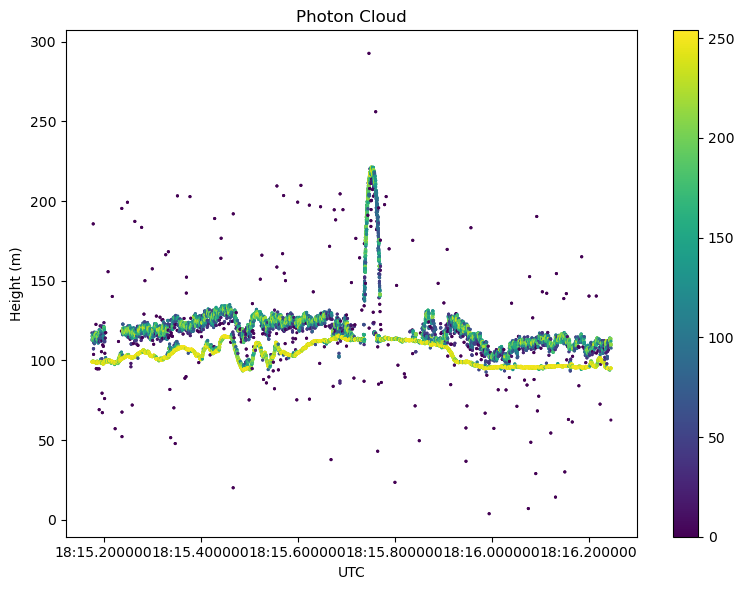

In [10]:
%matplotlib inline
SRwidgets.plot(atl03=gdf, kind='scatter', title='Photon Cloud',
    cmap=SRwidgets.colormap, legend=True, legend_frameon=True,
    classification=SRwidgets.plot_classification.value, 
    segments=False)